# WAVEPAL

In [2]:
% matplotlib inline
# other option (instead of "inline"): nbagg
# N.B.: the two previous lines are used by ipython. Do not write them in your python code.  
import numpy as np
import matplotlib.pyplot as plt
import copy
import wavepal as wv
import pandas as pd

In [3]:
data = pd.read_csv("/home/sysop/Documents/KurtWogau/2500yrData2.csv")

In [ ]:
data;

In [5]:
x1 = data['Sr/Fe'].values
y1 = data['Ti'].values
t = data['Yr BP'].values

In [6]:
x = wv.Wavepal(t,x1,"Age", "$\delta{}^{18}O$", t_units="ka", mydata_units="permil")

In [7]:
x

<wavepal.Wavepal.Wavepal instance at 0x7fe86ba8c5f0>

In [8]:
help(x.__init__)

Help on method __init__ in module wavepal.Wavepal:

__init__(self, t, mydata, t_axis_label='', mydata_axis_label='', t_units=None, mydata_units=None) method of wavepal.Wavepal.Wavepal instance
    Constructor of Wavepal class. It Initializes all the variables of Wavepal class with an access outside Wavepal (the user can access them). The list of available variables is given in this function.
    Required Inputs:
    - t [1-dim numpy array of floats]: the times of the time series, distinct and in ascending order.
    - mydata [1-dim numpy array of floats - size=time.size]: the data at the times given by 't'.
    Optional Inputs:
    - t_axis_label="": label for the time axis in figures
    - mydata_axis_label="": label for the data axis in figures
    - t_units=None: units of 't' (string type)
    - mydata_units=None: units of 'mydata' (string type).
    Outputs:
    /
    -----------------------------
    This is part of WAVEPAL
    (C) 2016 G. Lenoir



In [9]:
x.check_data()

The program will automatically select the first occurrence of the time/age (and skip the others) where they are the same (times/ages are previously set in ascending order)
same time/age at  243.08
same time/age at  960.44
same time/age at  1596.15


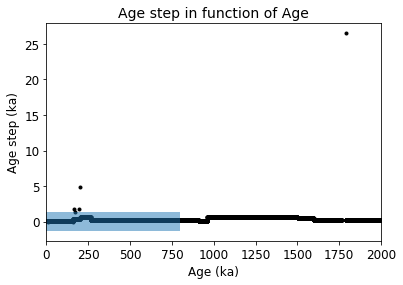

In [11]:
plot_timestep=x.plot_timestep()
plot_timestep.show()

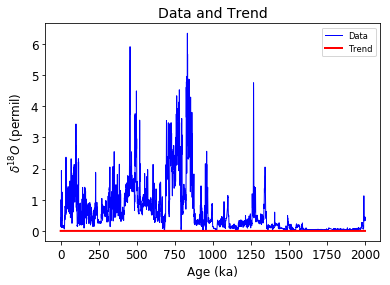

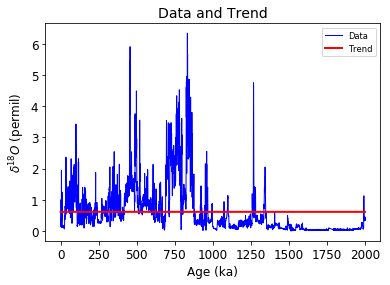

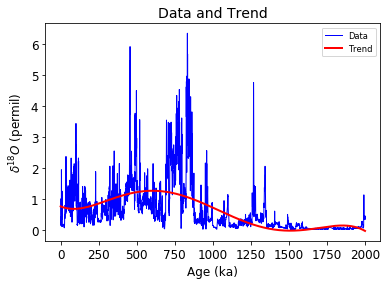

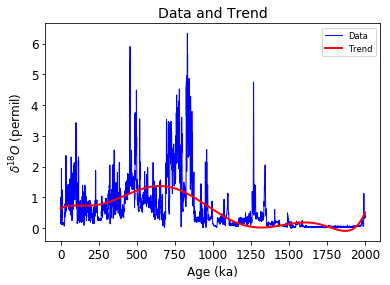

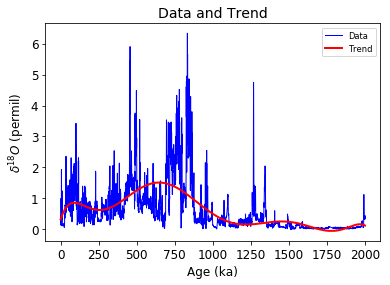

In [12]:
plot_trend=x.plot_trend(pol_degree=-1)    # no trend
plot_trend.show()
plot_trend=x.plot_trend(pol_degree=0)    # constant trend
plot_trend.show()
plot_trend=x.plot_trend(pol_degree=5)    
plot_trend.show()
plot_trend=x.plot_trend(pol_degree=7)   
plot_trend.show()
plot_trend=x.plot_trend(pol_degree=9)    
plot_trend.show()

In [18]:
x.choose_trend_degree(-1)

In [19]:
x.trend_vectors()

In [23]:
x.carma_params(make_carma_fig=True,nbins=20,dpi=400,path_to_figure_folder="/home/sysop/Documents/KurtWogau/WAVEPAL-master/examples/figures_carma/")  

****************************
*        CARMA PACK        *
****************************

FIRST ROUND (to estimate the number of independent samples): with  10000  samples
**********************************************************************************************************
Calculating sigma...
Calculating log-likelihoods...
Decorrelation length (in number of samples) - Estimation:  11

SECOND ROUND: generates  11000  samples
***************************************
Calculating sigma...
Calculating log-likelihoods...
Plotting parameter summary
Plotting parameter summary
Plotting parameter summary
Plotting parameter summary
Decorrelation length (in number of samples):  14
**************************************
*        BUILD CARMA MATRIX K        *
**************************************
Computing the median parameters of the CAR-1 process from  786  MCMC samples.
Median parameters:
--------------------
alpha:  0.107539017778
std white noise:  0.368301781846


In [21]:
percentile=np.zeros(2)
percentile[0]=95.
percentile[1]=99.9

In [24]:
x.freq_analysis(freqstep=0.0001,D=600.,percentile=percentile,n_moments=12,computes_amplitude=True)

 10%|█         | 1/10 [00:00<00:00,  9.59it/s]

Re-estimated D factor (WOSA):  615.363076923
Preliminary steps for the WOSA periodogram:


  0%|          | 2/11755 [00:00<10:54, 17.97it/s]

Re-estimated frequency range: from  0.00170001990022  to  1.17710237032 
Main loop, over the frequencies:


100%|██████████| 11755/11755 [09:46<00:00, 20.06it/s]


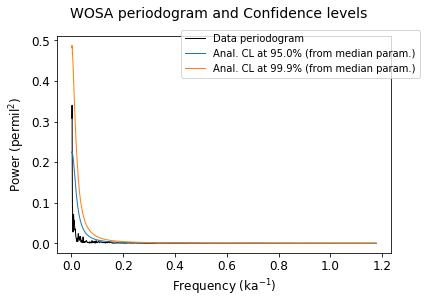

In [25]:
plot_periodogram=x.plot_periodogram(fontsize_legend=10)
plot_periodogram.show()

In [27]:
theta=np.linspace(t[0],t[-1],2000)

In [28]:
x.timefreq_analysis(theta=theta,w0=5.5,permin=10.,percentile=percentile)

  0%|          | 2/2000 [00:00<01:48, 18.34it/s]

Weights for the scalogram and Shannon-Nyquist exclusion zone:


  0%|          | 0/101 [00:00<?, ?it/s]

Re-estimated period range: from  10.0  to  320.0
Main loop, over the time-frequency plane:


100%|██████████| 101/101 [31:36<00:00, 18.77s/it]


In [29]:
time_string=[0., 500., 1000., 1500., 2000., 2500., 3000., 3500., 4000., 4500., 5000., 5500., 6000.]
period_string=[10., 21., 41., 100., 200., 400., 800., 1500.]
dashed_periods=[21., 41., 100.]

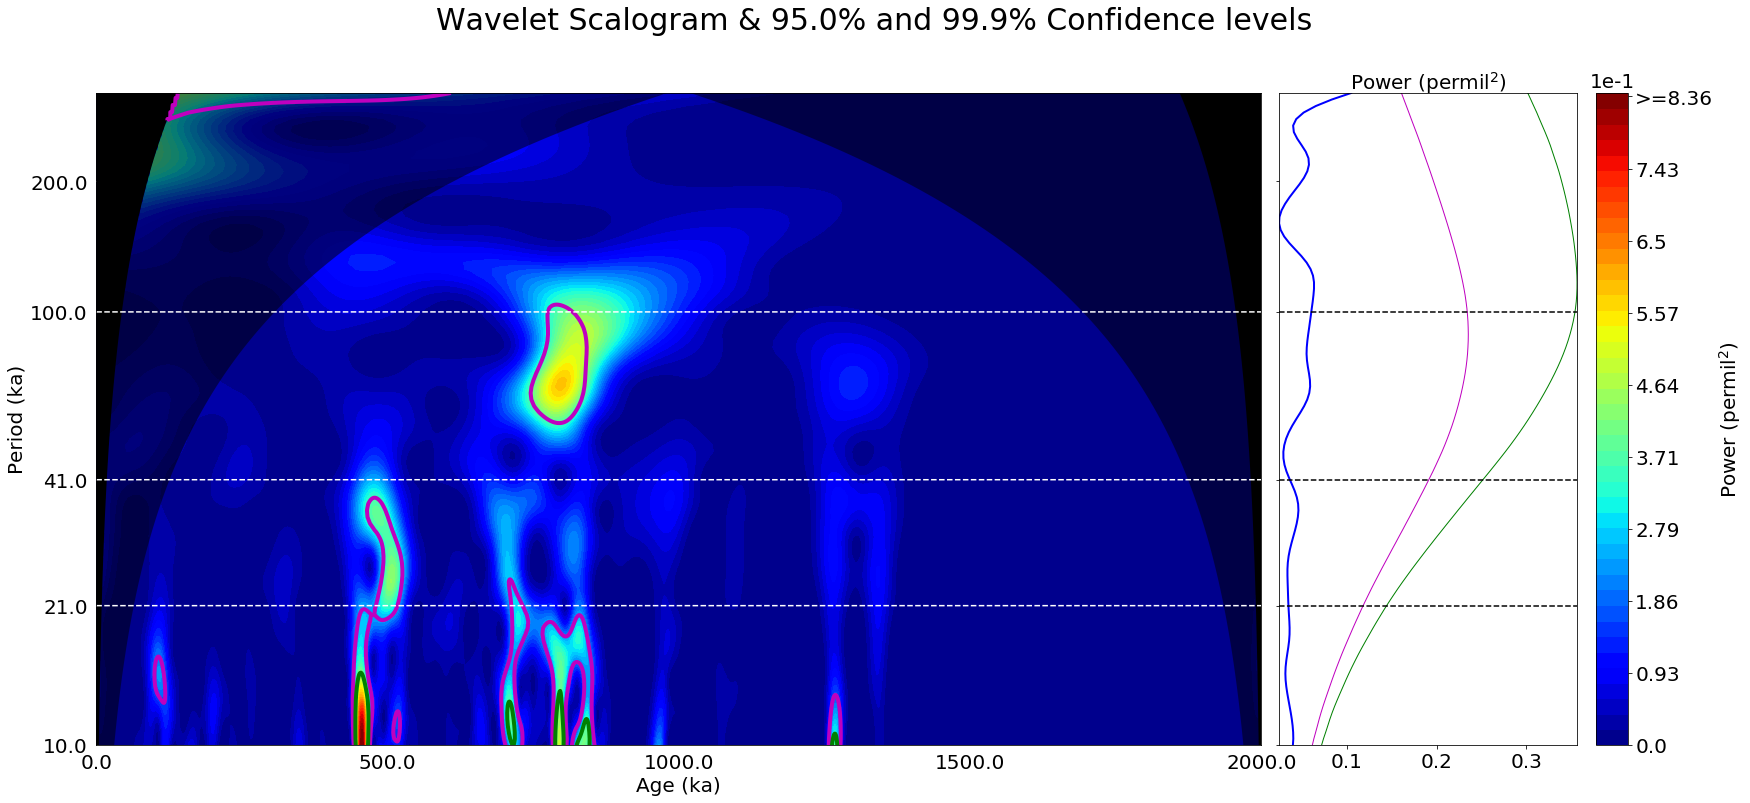

In [30]:
plot_scalogram=x.plot_scalogram(color_cl_anal=['m','g'],fontsize_title=30,fontsize_ticks=20,fontsize_axes=20,time_string=time_string,period_string=period_string,dashed_periods=dashed_periods,linewidth_cl=4,global_scal_xlabel_ticks="bottom",decimals=2,linewidth_gscal=2.0)
fig = plt.gcf() 
fig.set_size_inches(24,12)
plot_scalogram.show() 

In [31]:
y=copy.copy(x)  # optional: in order to keep in memory all what we did up to here (very convenient if you work with ipython)
y.timefreq_analysis(theta=theta,w0=15.0,permin=10.,percentile=percentile)

  0%|          | 2/2000 [00:00<01:41, 19.69it/s]

Weights for the scalogram and Shannon-Nyquist exclusion zone:


  0%|          | 0/72 [00:00<?, ?it/s]

Re-estimated period range: from  10.0  to  117.126855676
Main loop, over the time-frequency plane:


100%|██████████| 72/72 [18:59<00:00, 15.82s/it]


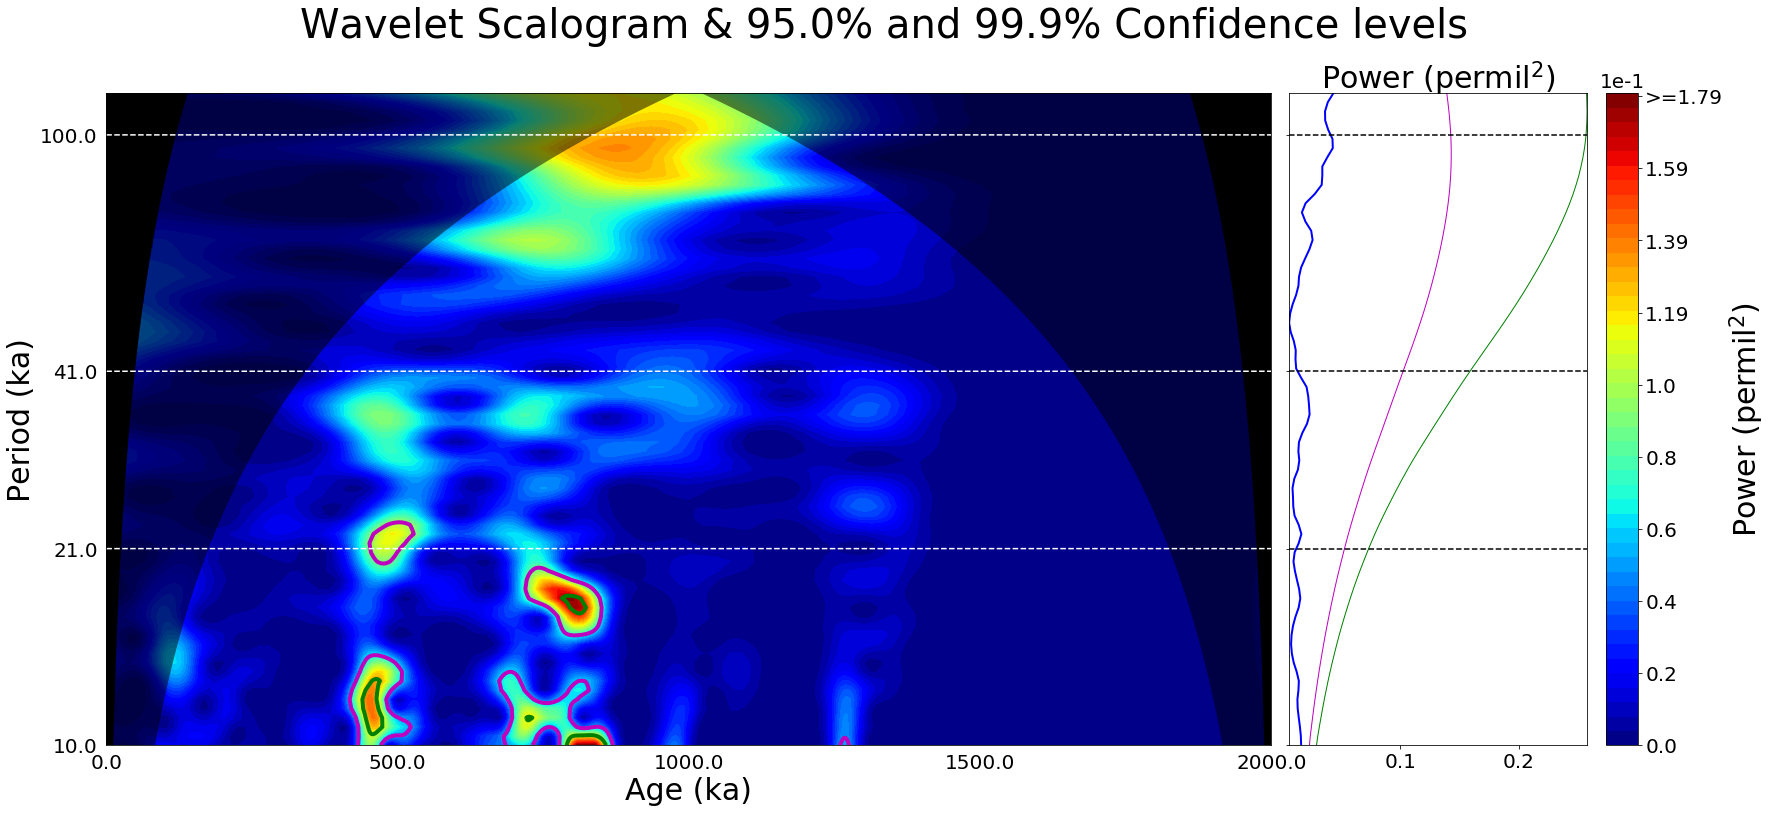

In [32]:
plot_scalogram=y.plot_scalogram(color_cl_anal=['m','g'],fontsize_title=40,fontsize_ticks=20,fontsize_axes=30,time_string=time_string,period_string=period_string,dashed_periods=dashed_periods,linewidth_cl=4,global_scal_xlabel_ticks="bottom",decimals=2,linewidth_gscal=2.0)
fig = plt.gcf()
fig.set_size_inches(24,12)
plot_scalogram.show()